# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [125]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train: {}'.format(len(X_train)))
print('X_test: {}'.format(len(X_test)))

X_train: 60000
X_test: 10000


### 2. Visualize the First Six Training Images

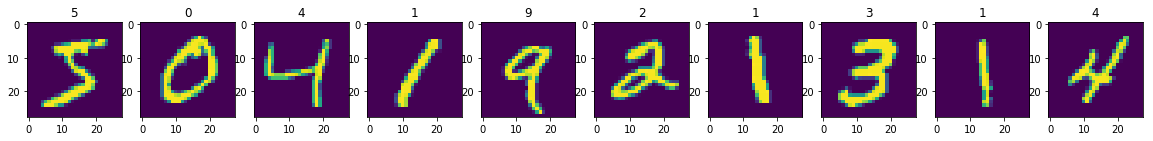

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(X_train[i])
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

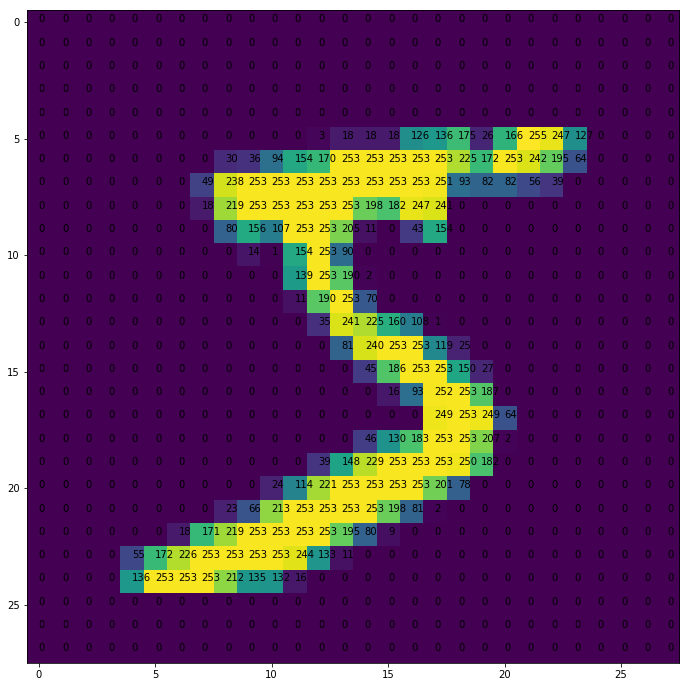

In [127]:
def visualize_input(img, ax):
    ax.imshow(img)
    (width, height) = img.shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

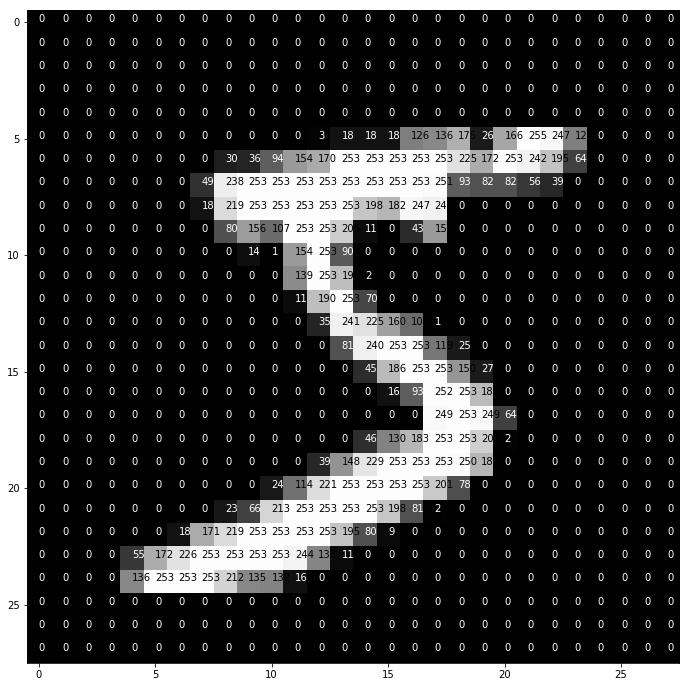

In [128]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    (width, height) = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x), color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [129]:
X_train = X_train/255
X_test = X_test/255

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [130]:
from keras.utils import np_utils

print(y_train[0:10])
print(y_test[0:10])

y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print(y_train[0:10])
print(y_test[0:10])


[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


### 6. Define the Model Architecture

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [156]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [157]:
model.evaluate(X_train, y_train, verbose=0)

[2.3249920010884604, 0.10043333333333333]

In [158]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
accuracy = 100 * score[1]

print(accuracy)
print('Test accuracy: %.4f%%' % accuracy)

[2.3296685623168947, 0.098299999999999998]
9.83
Test accuracy: 9.8300%


### 9. Train the Model

In [159]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.mine.hdf5', save_best_only=True, verbose=1)
hist = model.fit(X_train, y_train, epochs=10, batch_size=128, callbacks=[checkpointer],
         verbose=1, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 99us/step - loss: 1.7791 - acc: 0.5669 - val_loss: 1.0775 - val_acc: 0.8278

Epoch 00001: val_loss improved from inf to 1.07748, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.8268 - acc: 0.8151 - val_loss: 0.5719 - val_acc: 0.8742

Epoch 00002: val_loss improved from 1.07748 to 0.57191, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.5762 - acc: 0.8526 - val_loss: 0.4476 - val_acc: 0.8922

Epoch 00003: val_loss improved from 0.57191 to 0.44759, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.4883 - acc: 0.8686 - val_loss: 0.3918 - val_acc: 0.9019

Epoch 00004: val_loss improved from 0.44759 to 0.39184, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000 [==

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [160]:
model.load_weights('mnist.model.best.mine.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [161]:
model.evaluate(X_train, y_train, verbose=0)

[0.30033321796953677, 0.91723333333333334]

In [162]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 92.1700%


### Using GridsearchCV

In [185]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [186]:
from keras.wrappers.scikit_learn import KerasClassifier

new_model = KerasClassifier(build_fn=create_model, verbose=1)

In [188]:
from sklearn.model_selection import GridSearchCV

batch_size = [50, 128, 500, 1000]
epochs = [4, 7, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=new_model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

print(grid_result.best_score_)
print(grid_result.best_params_)

Epoch 1/4
40000/40000 [==============================] - 6s 151us/step - loss: 1.2147 - acc: 0.7232
Epoch 2/4
40000/40000 [==============================] - 6s 143us/step - loss: 0.5041 - acc: 0.8638
Epoch 3/4
40000/40000 [==============================] - 7s 168us/step - loss: 0.4072 - acc: 0.8854
Epoch 4/4
40000/40000 [==============================] - 2s 40us/step
Epoch 1/4
40000/40000 [==============================] - 8s 195us/step - loss: 1.2650 - acc: 0.6900
Epoch 2/4
40000/40000 [==============================] - 7s 177us/step - loss: 0.5065 - acc: 0.8643
Epoch 3/4
40000/40000 [==============================] - 7s 180us/step - loss: 0.4080 - acc: 0.8855
Epoch 4/4
40000/40000 [==============================] - 1s 30us/step
Epoch 1/4
40000/40000 [==============================] - 6s 151us/step - loss: 1.2585 - acc: 0.7018
Epoch 2/4
40000/40000 [==============================] - 5s 131us/step - loss: 0.5148 - acc: 0.8646
Epoch 3/4
40000/40000 [==============================] - 5s 

40000/40000 [==============================] - 1s 14us/step
Epoch 1/7
40000/40000 [==============================] - 4s 95us/step - loss: 2.1964 - acc: 0.2088
Epoch 2/7
40000/40000 [==============================] - 2s 43us/step - loss: 1.9891 - acc: 0.4933
Epoch 3/7
40000/40000 [==============================] - 2s 45us/step - loss: 1.7212 - acc: 0.6735
Epoch 4/7
40000/40000 [==============================] - 2s 47us/step - loss: 1.3939 - acc: 0.7478
Epoch 5/7
40000/40000 [==============================] - 2s 49us/step - loss: 1.1187 - acc: 0.7844
Epoch 6/7
40000/40000 [==============================] - 2s 47us/step - loss: 0.9344 - acc: 0.8038
Epoch 7/7
40000/40000 [==============================] - 0s 9us/step
Epoch 1/7
40000/40000 [==============================] - 3s 80us/step - loss: 2.2192 - acc: 0.2366
Epoch 2/7
40000/40000 [==============================] - 2s 43us/step - loss: 2.0319 - acc: 0.5204
Epoch 3/7
40000/40000 [==============================] - 2s 44us/step - loss: 1